In [1]:
import numpy as np
import scipy.sparse.linalg as spla
import sympy as sp
import matplotlib.pyplot as plt


In [2]:
kapital = 100
oprocentowanie = 0.1
lata = 5

In [3]:
def kapitalizacja_odsetek(kapital_poczatkowy, oprocentowanie_roczne, okres_lat, kapitalizacja_na_rok=1):
    n = kapitalizacja_na_rok * okres_lat
    stopa_okresowa = oprocentowanie_roczne / kapitalizacja_na_rok
    kapital_koncowy = kapital_poczatkowy * (1 + stopa_okresowa) ** n
    return kapital_koncowy


# Parametry z przykładu
kapital_poczatkowy = 100
oprocentowanie = 0.1  # 10% rocznie
lata = 5

print("=" * 50)
print("KALKULATOR KAPITALIZACJI ODSETEK")
print("=" * 50)
print(f"\nKapitał początkowy: {kapital_poczatkowy} zł")
print(f"Oprocentowanie roczne: {oprocentowanie * 100}%")
print(f"Okres: {lata} lat\n")

print("Wyniki dla różnych częstotliwości kapitalizacji:\n")

kapitalizacje = {
    "Roczna (1x w roku)": 1,
    "Półroczna (2x w roku)": 2,
    "Kwartalna (4x w roku)": 4,
    "Miesięczna (12x w roku)": 12,
    "Dzienna (365x w roku)": 365
}

for nazwa, czestotliwosc in kapitalizacje.items():
    wynik = kapitalizacja_odsetek(kapital_poczatkowy, oprocentowanie, lata, czestotliwosc)
    zysk = wynik - kapital_poczatkowy
    print(f"{nazwa:25} → {wynik:.2f} zł (zysk: {zysk:.2f} zł)")

print("\n" + "=" * 50)
print("SYMULACJA ROK PO ROKU (kapitalizacja roczna):")
print("=" * 50)

kapital = kapital_poczatkowy
for rok in range(1, lata + 1):
    odsetki = kapital * oprocentowanie
    kapital += odsetki
    print(f"Rok {rok}: {kapital:.2f} zł (odsetki: {odsetki:.2f} zł)")

print(f"\nCałkowity zysk: {kapital - kapital_poczatkowy:.2f} zł")

KALKULATOR KAPITALIZACJI ODSETEK

Kapitał początkowy: 100 zł
Oprocentowanie roczne: 10.0%
Okres: 5 lat

Wyniki dla różnych częstotliwości kapitalizacji:

Roczna (1x w roku)        → 161.05 zł (zysk: 61.05 zł)
Półroczna (2x w roku)     → 162.89 zł (zysk: 62.89 zł)
Kwartalna (4x w roku)     → 163.86 zł (zysk: 63.86 zł)
Miesięczna (12x w roku)   → 164.53 zł (zysk: 64.53 zł)
Dzienna (365x w roku)     → 164.86 zł (zysk: 64.86 zł)

SYMULACJA ROK PO ROKU (kapitalizacja roczna):
Rok 1: 110.00 zł (odsetki: 10.00 zł)
Rok 2: 121.00 zł (odsetki: 11.00 zł)
Rok 3: 133.10 zł (odsetki: 12.10 zł)
Rok 4: 146.41 zł (odsetki: 13.31 zł)
Rok 5: 161.05 zł (odsetki: 14.64 zł)

Całkowity zysk: 61.05 zł


In [4]:
t = 4/0.03 *np.log(10)
print(t)

307.0113457325395


### Równanie różniczkowe logistyczne

Rozważmy klasyczne równanie logistyczne w postaci:
$ \frac{dx}{dt} = k\,x(t)\,\big(1 - a\,x(t)\big) $
gdzie:
- $k$ – współczynnik wzrostu populacji,  
- $a$ – współczynnik ograniczający (związany z pojemnością środowiska \(K = 1/a\)),  
- $x_0 = x(0)$ – wartość początkowa.

Symboliczne rozwiązanie uzyskane przy pomocy **SymPy** ma postać:
$ x(t) = \frac{1/a}{1 + \left(\frac{1}{a\,x_0} - 1\right)e^{-k t}} $

Poniżej przedstawiono wykres rozwiązania dla parametrów:
- $k = 1$
- $a = 0.1$
- $x_0 = 1$

Linia przerywana reprezentuje poziom asymptotyczny $K = 1/a = 10$, do którego zbiega rozwiązanie w miarę upływu czasu. Innymi słowy poziom ten jest wartością nasycenia; populacja $x(t)$ rośnie szybko na początku, ale z czasem wzrost spowalnia i zatrzymuje się, gdy osiąga pewną maksymalną wartość, którą jest właśnie nasycenie.

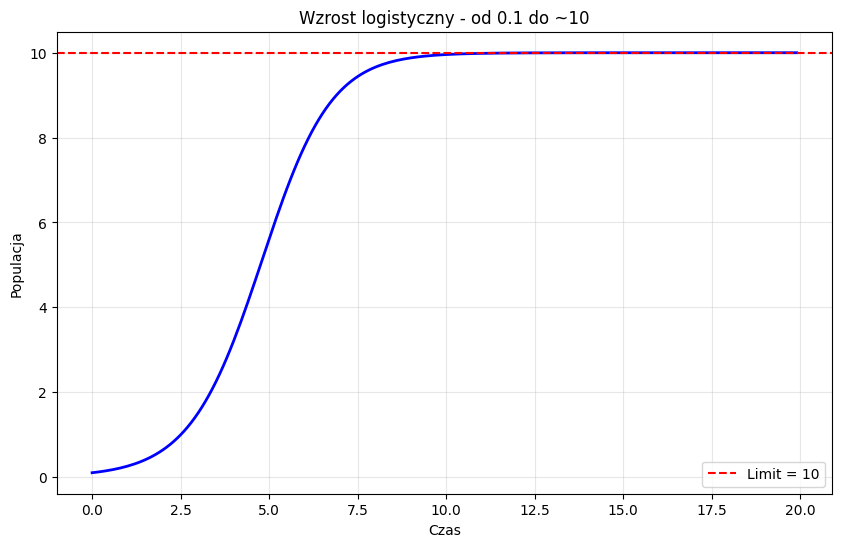

Start: 0.10
Koniec: 10.00


In [5]:
import matplotlib.pyplot as plt

# Parametry
x = 0.1       # start
k = 1.0       # tempo wzrostu
a = 0.1       # limit (max = 1/a = 10)
dt = 0.1      # krok czasu

# Symulacja
czas = []
populacja = []

for i in range(200):
    t = i * dt
    czas.append(t)
    populacja.append(x)
    dx = k * x * (1 - a * x) * dt
    x = x + dx

# Wykres
plt.figure(figsize=(10, 6))
plt.plot(czas, populacja, 'b-', linewidth=2)
plt.axhline(y=10, color='r', linestyle='--', label='Limit = 10')
plt.xlabel('Czas')
plt.ylabel('Populacja')
plt.title('Wzrost logistyczny - od 0.1 do ~10')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print(f"Start: {populacja[0]:.2f}")
print(f"Koniec: {populacja[-1]:.2f}")

Symboliczne rozwiązanie:
Eq(x(t), 1/(a*(1 + (-a*x_0 + 1)*exp(-k*t)/(a*x_0))))

In [6]:
from sympy import symbols, Function, dsolve, Eq, Derivative, exp, simplify, Symbol

In [7]:
t, r, K, t0, y0 = symbols('t r K t0 y0')
y = Function('y')

ode = Eq(Derivative(y(t), t), r * y(t) * (1 - y(t)/K))

ics = {y(t0): y0}

sol = dsolve(ode, ics=ics)

print(simplify(sol))


Eq(y(t), K*y0*exp(r*t)/(y0*exp(r*t) + (K - y0)*exp(r*t0)))


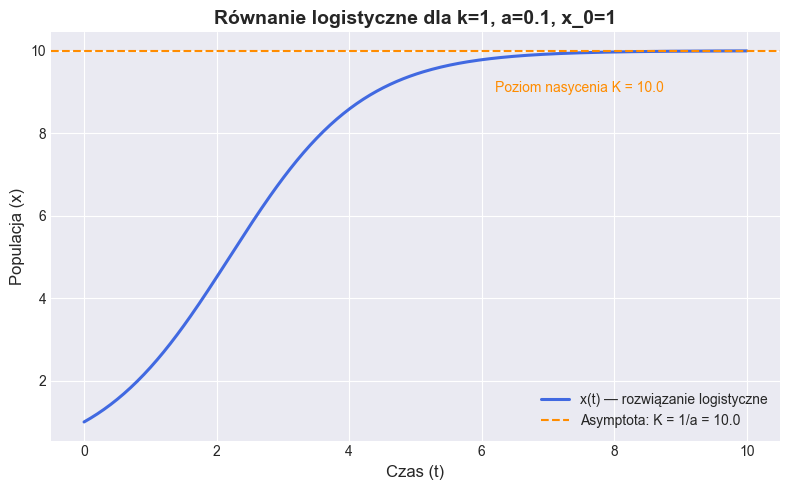

Symboliczne rozwiązanie:
Eq(x(t), 1/(a*(1 + (-a*x_0 + 1)*exp(-k*t)/(a*x_0))))


In [8]:
t = symbols('t', real=True)
k, a = symbols('k a', positive=True)
x_0 = Symbol('x_0', positive=True)
x = Function('x')

eq_log = Eq(x(t).diff(t), k * x(t) * (1 - a * x(t)))
res_log = dsolve(eq_log, ics={x(0): x_0})

k_val, a_val, x0_val = 1, 0.1, 1
t_vals = np.linspace(0, 10, 300)

x_vals = [
    res_log.rhs.subs({k: k_val, a: a_val, x_0: x0_val, t: val}).evalf()
    for val in t_vals
]

plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(t_vals, x_vals, color='royalblue', linewidth=2.2, label='x(t) — rozwiązanie logistyczne')

ax.set_xlabel('Czas (t)', fontsize=12)
ax.set_ylabel('Populacja (x)', fontsize=12)
ax.set_title(f'Równanie logistyczne dla k={k_val}, a={a_val}, x_0={x0_val}', fontsize=14, weight='bold')

K = 1/a_val
ax.axhline(K, color='darkorange', linestyle='--', linewidth=1.5, label=f'Asymptota: K = 1/a = {K:.1f}')

ax.legend(fontsize=10)
ax.text(6.2, K * 0.9, f'Poziom nasycenia K = {K:.1f}', color='darkorange')
ax.tick_params(axis='both', labelsize=10)
plt.tight_layout()
plt.show()

print("Symboliczne rozwiązanie:")
print(res_log)

## Zmodyfikowane równanie logistyczne

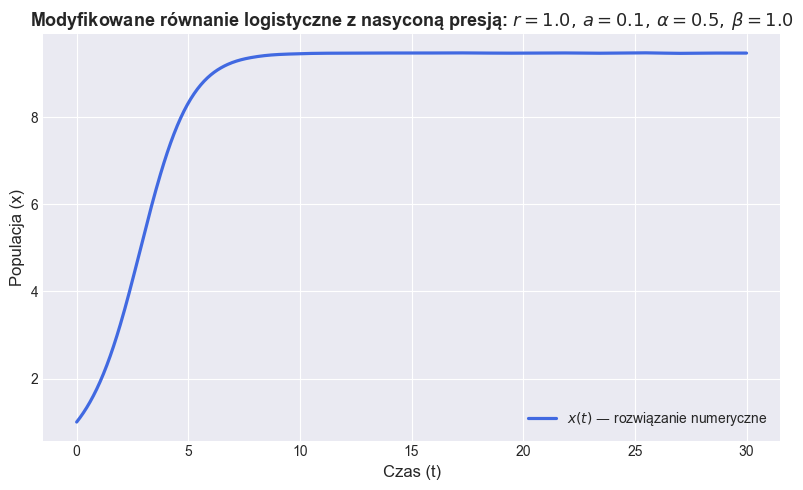

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parametry modelu
r = 1.0       # współczynnik wzrostu
a = 0.1       # ograniczenie środowiskowe (1/K)
alpha = 0.5   # maksymalne tempo strat
beta = 1.0    # parametr nasycenia presji
x0 = 1.0      # warunek początkowy
t_span = (0, 30)
t_eval = np.linspace(*t_span, 600)

# Równanie różniczkowe z nasyconą presją p(x)
def logistic_with_pressure(t, x, r, a, alpha, beta):
    pressure = (alpha * x**2) / (beta**2 + x**2)
    return r * x * (1 - a * x) - pressure

# Rozwiązanie numeryczne
sol = solve_ivp(logistic_with_pressure, t_span, [x0],
                args=(r, a, alpha, beta), t_eval=t_eval)

# Wykres
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(sol.t, sol.y[0], color='royalblue', linewidth=2.3,
        label=r'$x(t)$ — rozwiązanie numeryczne')

# Opisy osi, tytuł i legenda
ax.set_xlabel('Czas (t)', fontsize=12)
ax.set_ylabel('Populacja (x)', fontsize=12)
ax.set_title(rf'Modyfikowane równanie logistyczne z nasyconą presją: '
             rf'$r={r},\, a={a},\, \alpha={alpha},\, \beta={beta}$',
             fontsize=13, weight='bold')
ax.legend(fontsize=10)
ax.tick_params(axis='both', labelsize=10)
plt.tight_layout()
plt.show()


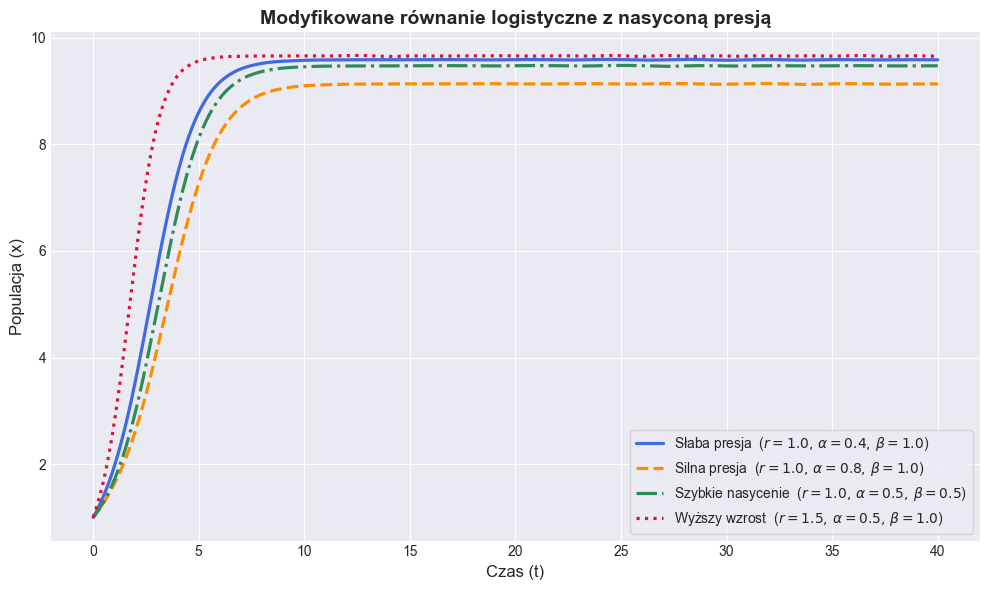

In [10]:

def logistic_with_saturated_pressure(t, x, r, a, alpha, beta):
    """Modyfikowane równanie logistyczne z nasyconą presją."""
    pressure = (alpha * x**2) / (beta**2 + x**2)
    return r * x * (1 - a * x) - pressure


a = 0.1       # ograniczenie środowiska (1/a = K)
x0 = 1.0      # warunek początkowy
t_span = (0, 40)
t_eval = np.linspace(*t_span, 800)


scenarios = [
    {"r": 1.0, "alpha": 0.4, "beta": 1.0, "label": "Słaba presja", "style": "-", "color": "royalblue"},
    {"r": 1.0, "alpha": 0.8, "beta": 1.0, "label": "Silna presja", "style": "--", "color": "darkorange"},
    {"r": 1.0, "alpha": 0.5, "beta": 0.5, "label": "Szybkie nasycenie", "style": "-.", "color": "seagreen"},
    {"r": 1.5, "alpha": 0.5, "beta": 1.0, "label": "Wyższy wzrost", "style": ":", "color": "crimson"},
]


plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))

for sc in scenarios:
    sol = solve_ivp(logistic_with_saturated_pressure, t_span, [x0],
                    args=(sc["r"], a, sc["alpha"], sc["beta"]),
                    t_eval=t_eval)
    ax.plot(sol.t, sol.y[0],
            sc["style"], color=sc["color"], linewidth=2.3,
            label=rf'{sc["label"]}  ($r={sc["r"]},\, \alpha={sc["alpha"]},\, \beta={sc["beta"]}$)')

ax.set_xlabel('Czas (t)', fontsize=12)
ax.set_ylabel('Populacja (x)', fontsize=12)
ax.set_title('Modyfikowane równanie logistyczne z nasyconą presją', fontsize=14, weight='bold')
ax.legend(fontsize=10, frameon=True)
ax.tick_params(axis='both', labelsize=10)
plt.tight_layout()
plt.show()


## Rozpad Radu

=== Parametry ===
T1/2 = 1600.0 lat
k = ln(2)/T1/2 = 0.000433216988 [1/rok]

=== Weryfikacja ===
m(0) = 100.000000000000 g  (oczek.: 100.0 g)
m(T1/2) = 50.000000000000 g  (oczek.: 50.000000000000 g), różnica = 0.000000000000e+00 g
m(2*T1/2) = 25.000000000000 g  (oczek.: 25.000000000000 g), różnica = 0.000000000000e+00 g
dm/dt|_0 (lewa) = -0.043321698785 g/rok,  -k*m(0) (prawa) = -0.043321698785 g/rok


c:\REPO\studia\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


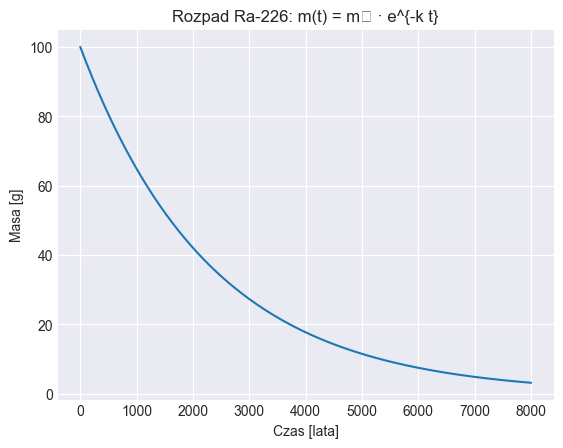

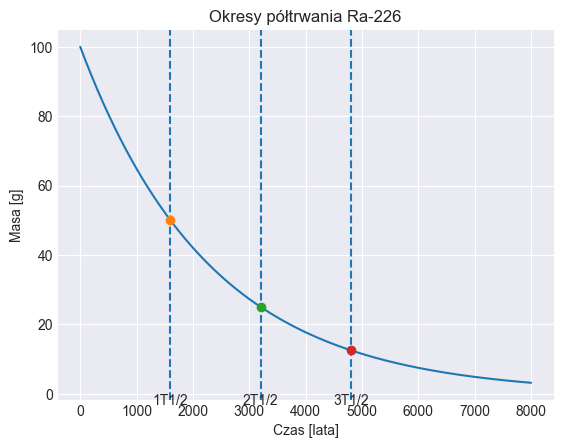

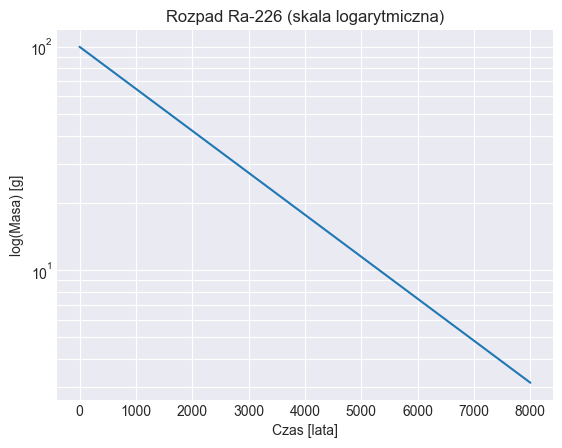

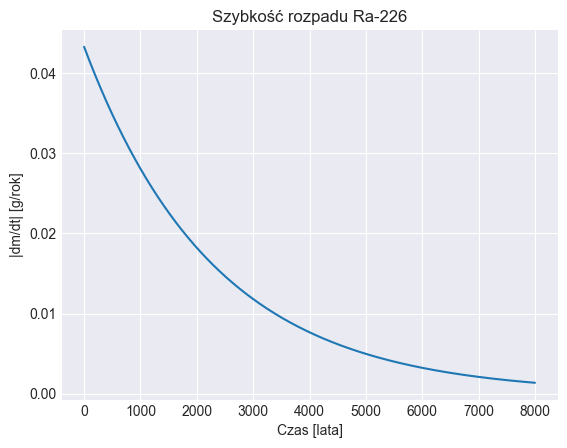

In [11]:
# radium_decay.py
# Model rozpadu Ra-226: dm/dt = -k * m, k = ln(2)/T1/2
# Zawiera: stałe, rozwiązanie m(t), weryfikacje, 4 wykresy (osobne figury)

import math
import numpy as np
import matplotlib.pyplot as plt

# --- 1) Stałe i jednostki ---
Thalf = 1600.0                 # [lata] - okres półtrwania
k = math.log(2.0) / Thalf      # [1/rok] - stała rozpadu

# --- 2) Rozwiązanie analityczne ---
def m_of_t(t, m0):
    """Masa [g] w chwili t [lata] dla m0 [g]."""
    return m0 * np.exp(-k * np.asarray(t))

def decay_rate(t, m0):
    """Szybkość rozpadu |dm/dt| [g/rok] = k * m(t)."""
    return k * m_of_t(t, m0)

# --- 3) Weryfikacje modelu ---
def verify(m0=100.0):
    m0_ex = m0
    m_at_0 = float(m_of_t(0.0, m0_ex))
    m_at_Thalf = float(m_of_t(Thalf, m0_ex))
    m_at_2Thalf = float(m_of_t(2*Thalf, m0_ex))
    diff_Thalf = abs(m_at_Thalf - m0_ex/2.0)
    diff_2Thalf = abs(m_at_2Thalf - m0_ex/4.0)
    lhs_derivative_at_0 = -k * m0_ex
    rhs_from_formula   = -k * m0_ex

    print("=== Parametry ===")
    print(f"T1/2 = {Thalf} lat")
    print(f"k = ln(2)/T1/2 = {k:.12f} [1/rok]")
    print("\n=== Weryfikacja ===")
    print(f"m(0) = {m_at_0:.12f} g  (oczek.: {m0_ex} g)")
    print(f"m(T1/2) = {m_at_Thalf:.12f} g  (oczek.: {m0_ex/2:.12f} g), różnica = {diff_Thalf:.12e} g")
    print(f"m(2*T1/2) = {m_at_2Thalf:.12f} g  (oczek.: {m0_ex/4:.12f} g), różnica = {diff_2Thalf:.12e} g")
    print(f"dm/dt|_0 (lewa) = {lhs_derivative_at_0:.12f} g/rok,  -k*m(0) (prawa) = {rhs_from_formula:.12f} g/rok")

# --- 4) Wizualizacje ---
def plots(m0=100.0, t_end=8000, n=801):
    t = np.linspace(0, t_end, n)

    # Wykres 1: m(t)
    plt.figure()
    plt.plot(t, m_of_t(t, m0))
    plt.xlabel("Czas [lata]")
    plt.ylabel("Masa [g]")
    plt.title("Rozpad Ra-226: m(t) = m₀ · e^{-k t}")
    plt.grid(True)
    plt.show()

    # Wykres 2: m(t) + T1/2, 2T1/2, 3T1/2
    plt.figure()
    plt.plot(t, m_of_t(t, m0))
    for nhalf in (1, 2, 3):
        t_n = nhalf * Thalf
        plt.axvline(t_n, linestyle="--")
        plt.plot([t_n], [m_of_t(t_n, m0)], marker="o")
        plt.text(t_n, 0, f"{nhalf}T1/2", ha="center", va="top")
    plt.xlabel("Czas [lata]")
    plt.ylabel("Masa [g]")
    plt.title("Okresy półtrwania Ra-226")
    plt.grid(True)
    plt.show()

    # Wykres 3: skala logarytmiczna (oś Y)
    plt.figure()
    plt.semilogy(t, m_of_t(t, m0))
    plt.xlabel("Czas [lata]")
    plt.ylabel("log(Masa) [g]")
    plt.title("Rozpad Ra-226 (skala logarytmiczna)")
    plt.grid(True, which="both")
    plt.show()

    # Wykres 4: szybkość rozpadu |dm/dt|
    plt.figure()
    plt.plot(t, decay_rate(t, m0))
    plt.xlabel("Czas [lata]")
    plt.ylabel("|dm/dt| [g/rok]")
    plt.title("Szybkość rozpadu Ra-226")
    plt.grid(True)
    plt.show()

# --- 5) Przykładowe uruchomienie ---
if __name__ == "__main__":
    verify(m0=100.0)
    plots(m0=100.0, t_end=8000, n=801)


## Równanie Ludwika

Analytical solution: Eq(x(t), 1/(a*(1 + (-a*x0 + 1)*exp(-k*t)/(a*x0))))


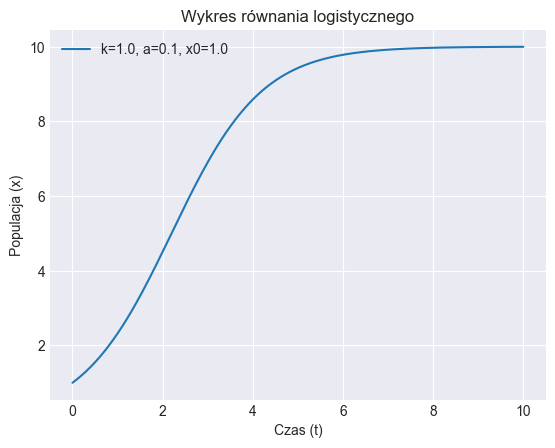

In [12]:
t = sp.symbols('t')
x = sp.Function('x')
k, a, x0 = sp.symbols('k a x0')
eq_log = sp.Eq(sp.Derivative(x(t), t), k*x(t)*(1 - a*x(t)))
res_log = sp.dsolve(eq_log, ics={x(0): x0})
print('Analytical solution:', res_log)

x_rhs_num = sp.lambdify((t, k, a, x0), res_log.rhs, 'numpy')

fig, ax = plt.subplots()
t_vals = np.linspace(0, 10, 200)
x_vals = x_rhs_num(t_vals, 1.0, 0.1, 1.0)
ax.plot(t_vals, x_vals, label='k=1.0, a=0.1, x0=1.0')
ax.set_xlabel('Czas (t)')
ax.set_ylabel('Populacja (x)')
ax.set_title('Wykres równania logistycznego')
ax.grid(True)
ax.legend()
plt.show()

Analytical solution: Eq(x(t), 1/(a*(1 + (-a*x0 + 1)*exp(-k*t)/(a*x0))))


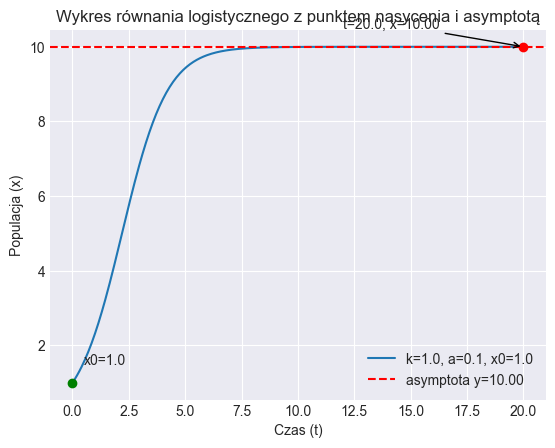

In [13]:
# (duplikat) Definicja symboli i rozwiązanie analityczne — ta komórka robi to samo co poprzednia
t = sp.symbols('t')
x = sp.Function('x')
k, a, x0 = sp.symbols('k a x0')
eq_log = sp.Eq(sp.Derivative(x(t), t), k*x(t)*(1 - a*x(t)))
res_log = sp.dsolve(eq_log, ics={x(0): x0})
print('Analytical solution:', res_log)

x_rhs_num = sp.lambdify((t, k, a, x0), res_log.rhs, 'numpy')

# Parametry i punkt nasycenia
k_val = 1.0
a_val = 0.1
x0_val = 1.0
saturation = 1.0 / a_val

fig, ax = plt.subplots()
t_vals = np.linspace(0, 20, 400)
x_vals = x_rhs_num(t_vals, k_val, a_val, x0_val)
ax.plot(t_vals, x_vals, label=f'k={k_val}, a={a_val}, x0={x0_val}')
ax.axhline(saturation, color='red', linestyle='--', label=f'asymptota y={saturation:.2f}')
t_end = t_vals[-1]
x_end = x_vals[-1]
ax.plot(t_end, x_end, 'o', color='red')
ax.annotate(f't={t_end:.1f}, x={x_end:.2f}', xy=(t_end, x_end), xytext=(t_end*0.6, saturation+0.5),
            arrowprops=dict(arrowstyle='->'))
ax.plot(0, x0_val, 'o', color='green')
ax.annotate(f'x0={x0_val}', xy=(0, x0_val), xytext=(0.5, x0_val+0.5))
ax.set_xlabel('Czas (t)')
ax.set_ylabel('Populacja (x)')
ax.set_title('Wykres równania logistycznego z punktem nasycenia i asymptotą')
ax.grid(True)
ax.legend()
plt.show()

In [14]:
# Obliczenie granicy dla wyrażenia:
# (x0*e^{kt}) / (a*x0*(e^{kt}-1) + 1) jako t -> +oo przy użyciu sympy
# Używamy nazwy x0, żeby nie nadpisać wcześniej zdefiniowanej funkcji x(t).
# Zakładamy k>0 przy obliczaniu granicy t->+oo.

t, k, a, x0 = sp.symbols('t k a x0')
expr = x0*sp.exp(k*t)/(a*x0*(sp.exp(k*t)-1) + 1)

# Aby wymusić założenie k>0, podstawiamy symbol k_pos z właściwością positive=True
k_pos = sp.symbols('k_pos', positive=True)
expr_kpos = expr.subs(k, k_pos)

lim_t_inf = sp.limit(expr_kpos, t, sp.oo)
print('Limit t->+oo (zakładając k>0):', lim_t_inf)

# Dla porównania: dzielenie przez e^{k t} i granica tego wyrażenia
expr_div = sp.simplify(x0/(a*x0*(1 - sp.exp(-k*t)) + sp.exp(-k*t)))
expr_div_kpos = expr_div.subs(k, k_pos)
lim_div = sp.limit(expr_div_kpos, t, sp.oo)
print('Limit (po podziale) t->+oo (zakładając k>0):', lim_div)

# Granica t->-oo
lim_t_minus = sp.limit(expr_div_kpos, t, -sp.oo)
print('Limit t->-oo (zakładając k>0):', lim_t_minus)

# Przykład numeryczny (k>0, a>0, x0>0) — powinno dać 1/a:
example = expr.subs({k:1, a:sp.Rational(1,10), x0:1})
print('Przykład (k=1, a=0.1, x0=1) limit t->+oo =', sp.limit(example, t, sp.oo))


Limit t->+oo (zakładając k>0): 1/a
Limit (po podziale) t->+oo (zakładając k>0): 1/a
Limit t->-oo (zakładając k>0): 0
Przykład (k=1, a=0.1, x0=1) limit t->+oo = 10


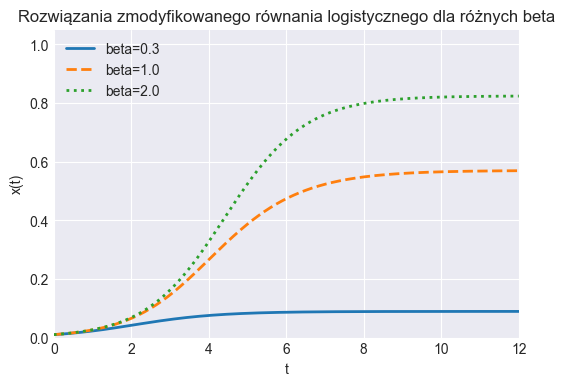

In [15]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

def p_of_x(x, alpha, beta):
    return (alpha * x**2 )/ (beta**2 + x**2)

def model(t, x, k, b, alpha, beta):
    _ = t 
    return k * x * (1 - (x / b)) - p_of_x(x, alpha, beta)

k = 1.0
b = 1.0  
alpha = 1.0
betas = [0.3, 1.0, 2.0]  
t_span = (0.0, 12.0)
t_eval = np.linspace(t_span[0], t_span[1], 400)
x0 = [0.01] 

fig, ax = plt.subplots(figsize=(6,4))
styles = ['-', '--', ':']
for beta, style in zip(betas, styles):
    sol = solve_ivp(model, t_span, x0, t_eval=t_eval, args=(k, b, alpha, beta), vectorized=False, rtol=1e-6)
    ax.plot(sol.t, sol.y[0], style, linewidth=2, label=f'beta={beta}')

ax.set_xlim(t_span)
ax.set_ylim(0, 1.05)
ax.set_xlabel('t')
ax.set_ylabel('x(t)')
ax.set_title('Rozwiązania zmodyfikowanego równania logistycznego dla różnych beta')
ax.legend()
ax.grid(True)
plt.show()


## Analiza modelu zmodyfikowanego równania logistycznego – przykład biologiczny (wzrost populacji bakterii)

Celem analizy było zbadanie wpływu dodatkowego członu hamującego na przebieg wzrostu populacji opisanego równaniem logistycznym. Rozważany model ma postać:

$$
\frac{dx}{dt} = kx\left(1 - \frac{x}{b}\right) - \frac{\alpha x^2}{\beta^2 + x^2}
$$

gdzie:
- $x(t)$ – liczebność populacji bakterii w czasie,  
- $k$ – współczynnik wzrostu,  
- $b$ – pojemność środowiska,  
- $\dfrac{\alpha x^2}{\beta^2 + x^2}$ – dodatkowy człon hamujący (np. przez toksyczne metabolity),  
- $\beta$ – parametr określający, przy jakiej liczebności hamowanie staje się istotne.

W praktyce taki model opisuje wzrost bakterii w zamkniętym bioreaktorze. Początkowo populacja rozwija się dynamicznie (etap wykładniczy), a następnie tempo wzrostu spada – najpierw z powodu ograniczeń środowiskowych (wyczerpywanie pożywki), a następnie dodatkowo wskutek gromadzenia się toksycznych produktów własnego metabolizmu, które hamują namnażanie.

Wyniki symulacji dla różnych wartości parametru $\beta$ pokazują, że:
- Dla małego $\beta = 0.3$ hamowanie jest silne już przy niskiej liczebności – populacja szybko stabilizuje się na niskim poziomie.  
- Dla średniego $\beta = 1.0$ hamowanie działa później, a populacja osiąga wyższy stan równowagi.  
- Dla dużego $\beta = 2.0$ toksyczne produkty mają znaczenie dopiero przy dużym zagęszczeniu – populacja osiąga najwyższy poziom.

Model ten lepiej od klasycznego modelu logistycznego odzwierciedla rzeczywiste procesy biologiczne, w których wzrost populacji nie jest ograniczany jedynie przez dostępność zasobów, lecz również przez negatywne sprzężenia zwrotne pojawiające się wraz ze wzrostem liczebności. Dzięki temu może być wykorzystywany np. w planowaniu biotechnologicznych procesów hodowli bakterii czy projektowaniu bioreaktorów.

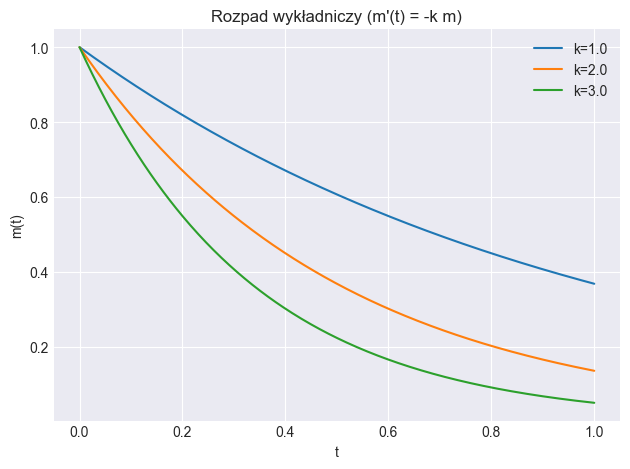

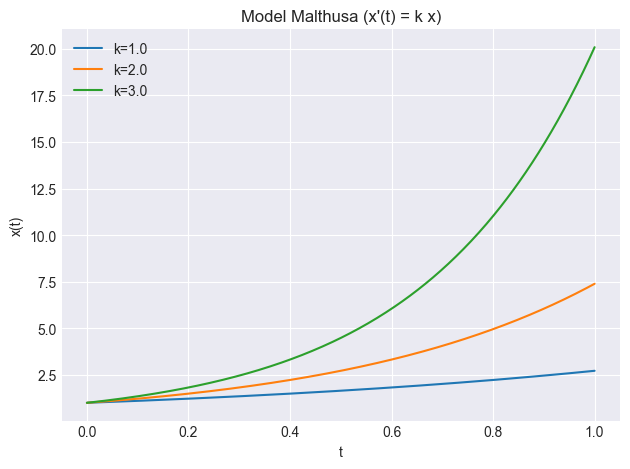

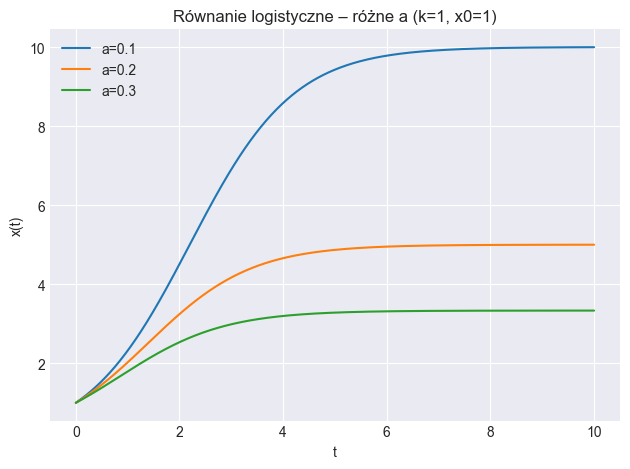

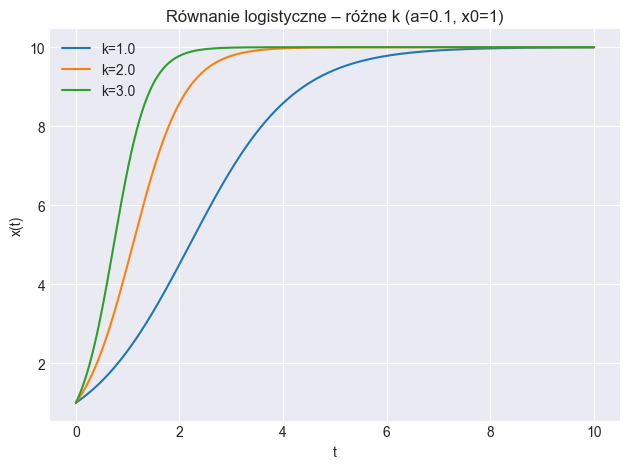

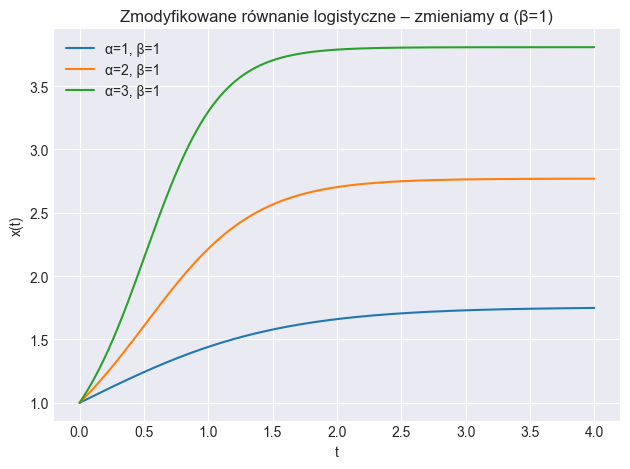

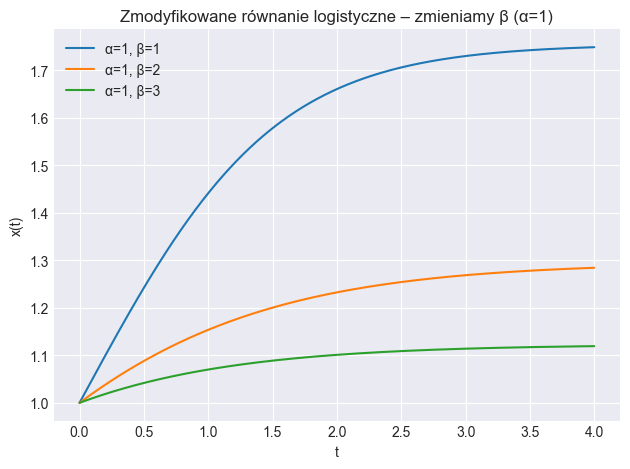

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# =========
# 1) Rozpad radu: m'(t) = -k m(t)  ->  m(t) = m0 * exp(-k t)
# =========

def decay_solution(t, m0=1.0, k=1.0):
    return m0 * np.exp(-k * t)

def plot_decay():
    t = np.linspace(0, 1, 400)
    ks = [1.0, 2.0, 3.0]
    plt.figure()
    for k in ks:
        plt.plot(t, decay_solution(t, m0=1.0, k=k), label=f"k={k}")
    plt.title("Rozpad wykładniczy (m'(t) = -k m)")
    plt.xlabel("t")
    plt.ylabel("m(t)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

# =========
# 2) Model Malthusa: x'(t) = k x(t)  ->  x(t) = x0 * exp(k t)
# =========

def malthus_solution(t, x0=1.0, k=1.0):
    return x0 * np.exp(k * t)

def plot_malthus():
    t = np.linspace(0, 1, 400)
    ks = [1.0, 2.0, 3.0]
    plt.figure()
    for k in ks:
        plt.plot(t, malthus_solution(t, x0=1.0, k=k), label=f"k={k}")
    plt.title("Model Malthusa (x'(t) = k x)")
    plt.xlabel("t")
    plt.ylabel("x(t)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

# =========
# 3) Równanie logistyczne: x'(t) = k x(t) (1 - a x(t)), x(0)=x0
#    Rozwiązanie analityczne:
#    x(t) = (e^{k t} x0) / (1 - a x0 + a e^{k t} x0)
# =========

def logistic_closed_form(t, x0, k, a):
    num = np.exp(k * t) * x0
    den = 1.0 - a * x0 + a * np.exp(k * t) * x0
    return num / den

def plot_logistic_vary_a():
    t = np.linspace(0, 10, 800)
    x0, k = 1.0, 1.0
    a_values = [0.1, 0.2, 0.3]
    plt.figure()
    for a in a_values:
        x = logistic_closed_form(t, x0=x0, k=k, a=a)
        plt.plot(t, x, label=f"a={a}")
    plt.title("Równanie logistyczne – różne a (k=1, x0=1)")
    plt.xlabel("t")
    plt.ylabel("x(t)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

def plot_logistic_vary_k():
    t = np.linspace(0, 10, 800)
    x0, a = 1.0, 0.1
    k_values = [1.0, 2.0, 3.0]
    plt.figure()
    for k in k_values:
        x = logistic_closed_form(t, x0=x0, k=k, a=a)
        plt.plot(t, x, label=f"k={k}")
    plt.title("Równanie logistyczne – różne k (a=0.1, x0=1)")
    plt.xlabel("t")
    plt.ylabel("x(t)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

# =========
# 4) Zmodyfikowane równanie logistyczne:
#    x'(t) = x(t) * ( 1 - x(t) + p(x(t); α, β) ),  x(0) = x0
#    p(x; α, β) = α x^2 / (β^2 + x^2)
#    Rozwiązujemy numerycznie za pomocą solve_ivp.
# =========

def p_term(x, alpha, beta):
    return alpha * x**2 / (beta**2 + x**2)

def modified_logistic_rhs(t, x, alpha, beta):
    # x może być skalarne (float) lub wektor (np.ndarray) z solve_ivp – obsłuż obie sytuacje
    return x * (1.0 - x + p_term(x, alpha, beta))

def solve_modified_logistic(alpha, beta, x0=1.0, t_span=(0.0, 4.0), num=800):
    t_eval = np.linspace(t_span[0], t_span[1], num)
    sol = solve_ivp(
        fun=lambda t, y: modified_logistic_rhs(t, y, alpha, beta),
        t_span=t_span,
        y0=[x0],
        t_eval=t_eval,
        rtol=1e-8,
        atol=1e-10,
        vectorized=False,
    )
    if not sol.success:
        raise RuntimeError(f"solve_ivp failed: {sol.message}")
    return sol.t, sol.y[0]

def plot_modified_logistic_vary_alpha():
    # s1: α=1, β=1  | s2: α=2, β=1 | s3: α=3, β=1
    t1, x1 = solve_modified_logistic(alpha=1.0, beta=1.0, x0=1.0, t_span=(0,4), num=800)
    t2, x2 = solve_modified_logistic(alpha=2.0, beta=1.0, x0=1.0, t_span=(0,4), num=800)
    t3, x3 = solve_modified_logistic(alpha=3.0, beta=1.0, x0=1.0, t_span=(0,4), num=800)

    plt.figure()
    plt.plot(t1, x1, label="α=1, β=1")
    plt.plot(t2, x2, label="α=2, β=1")
    plt.plot(t3, x3, label="α=3, β=1")
    plt.title("Zmodyfikowane równanie logistyczne – zmieniamy α (β=1)")
    plt.xlabel("t")
    plt.ylabel("x(t)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

def plot_modified_logistic_vary_beta():
    # s1: α=1, β=1  | s4: α=1, β=2 | s5: α=1, β=3
    t1, x1 = solve_modified_logistic(alpha=1.0, beta=1.0, x0=1.0, t_span=(0,4), num=800)
    t4, x4 = solve_modified_logistic(alpha=1.0, beta=2.0, x0=1.0, t_span=(0,4), num=800)
    t5, x5 = solve_modified_logistic(alpha=1.0, beta=3.0, x0=1.0, t_span=(0,4), num=800)

    plt.figure()
    plt.plot(t1, x1, label="α=1, β=1")
    plt.plot(t4, x4, label="α=1, β=2")
    plt.plot(t5, x5, label="α=1, β=3")
    plt.title("Zmodyfikowane równanie logistyczne – zmieniamy β (α=1)")
    plt.xlabel("t")
    plt.ylabel("x(t)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

def main():
    # 1) Rozpad
    plot_decay()
    # 2) Malthus
    plot_malthus()
    # 3) Logistyczne: różne a i różne k
    plot_logistic_vary_a()
    plot_logistic_vary_k()
    # 4) Zmodyfikowane logistyczne: różne α i β
    plot_modified_logistic_vary_alpha()
    plot_modified_logistic_vary_beta()

    # Pokaz wszystkich figur
    plt.show()

if __name__ == "__main__":
    main()